# Part 1 - read in data for Toronto

Note: Alternative methods used to create output have been commented out

In [2]:
# load dependencies (using pandas for imports and data manipulation)
import pandas as pd

In [3]:
# File import and note that first row on site has headers 
tr001_import = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", header=0)

In [4]:
# table we need is the first table on the website 
tr002_raw_df = tr001_import[0]

In [5]:
# check contents of the table 
tr002_raw_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [6]:
# 288 rows of data initially 
tr002_raw_df.shape

(288, 3)

In [7]:
# Filter out any postcodes that are not assigned to borough
tr003_filtered_df = tr002_raw_df[tr002_raw_df['Borough'] != 'Not assigned']

In [8]:
# 288 filtered down to 211 postcodes 
tr003_filtered_df.shape

(211, 3)

In [9]:
# create a grouping object by postcode 
tr004_groups = tr003_filtered_df.groupby('Postcode')

In [10]:
# check max entries per postcode - borough name 
tr004_groups['Borough'].nunique().max()

1

In [11]:
# check max entries per postcode - neighbourhood name 
tr004_groups['Neighbourhood'].nunique().max()

8

In [12]:
# validate type of data created 
type(tr004_groups)

pandas.core.groupby.groupby.DataFrameGroupBy

In [13]:
# create the list at postcode level 
tr005_postcode = tr003_filtered_df.groupby('Postcode').agg({
    'Borough': {
        'Borough': 'unique'
    },
    'Neighbourhood': {
        'Neighbourhood': 'unique',
        'CountNeighbourhood':  'count'
    }
})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [14]:
# Note this method works, but will shortly be removed from future python, hence will redo in another format 
# uncomment below to see result (includes additional field to show neighbourhodd count in postcode)
#tr005_postcode

In [15]:
# validate output is correctly updated to dataframe 
type(tr005_postcode)

pandas.core.frame.DataFrame

In [16]:
# take first row of each group by (postcode and borough correct in this)
tr006_pc = tr004_groups.first()

In [17]:
# trying list comprehension to create list of neighbourhoods
# [Neighbourhood.str.join(',') if Neighbourhood != 'Not assigned' else Borough for Borough, Neighbourhood in tr004_groups]

In [18]:
# list all neighbourhoods in each postcode (take from postcode object)
tr006_pc['Neighbourhood'] = tr004_groups['Neighbourhood'].unique().str.join(', ')

In [19]:
#tr004_groups['Neighbourhood'].unique().str.join(', ')

In [20]:
# now update missing neighbourhoods with the borough name 
#df_miss_nbhd = tr006_pc['Neighbourhood'] == 'Not assigned'

In [21]:
#df_miss_nbhd.shape

In [22]:
#df_miss_nbhd.tail()

In [23]:
# tr007_pc = tr006_pc.apply(lambda x: x['Neighbourhood'] if x['Neighbourhood'] != 'Not assigned' else x['Borough'], axis=1)

In [24]:
# Update neighbourhood varaible where not assigned to value in borough (M7A record picked up by logic)
tr006_pc['Neighbourhood'][tr006_pc['Neighbourhood'] == 'Not assigned'] = tr006_pc['Borough'][tr006_pc['Neighbourhood'] == 'Not assigned']

In [25]:
#[Neighbourhood if Neighbourhood != 'Not assigned' else Borough for Borough, Neighbourhood in tr006_pc['Borough', 'Neighbourhood']]

In [26]:
# Show required output that answers part 1 - also see below the second output of shape of dataset 
tr006_pc

,Borough,Neighbourhood
Postcode,,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"


In [27]:
tr006_pc.shape

(103, 2)

# Part 2 - Add geo-coordinates to the data set created 

In [28]:
# Read in coordinate data for Toronto 
gc001 = pd.read_csv('https://cocl.us/Geospatial_data')

In [29]:
gc001

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [30]:
# merge the coordinates data to the toronto neighbourhoods data set 
tr100_toronto_geo = pd.merge(tr006_pc, gc001.rename(columns={'Postal Code':'Postcode'}), on='Postcode',  how='left')

In [31]:
tr100_toronto_geo.shape 

(103, 5)

In [32]:
tr100_toronto_geo

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


# Part 3  - Exploring Toronto Dataset

In [33]:
# import dependencies for this section
import folium

In [34]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.715383, -79.405678], zoom_start=11)

# add markers to map
for lat, lng, label in zip(tr100_toronto_geo['Latitude'], tr100_toronto_geo['Longitude'], tr100_toronto_geo['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_toronto)  

# Show map 
map_toronto

By mapping the neighbourhoods, it is possible to see a concentrated cluster by Toronto Union station. 

In [35]:
# This neighbourhood is the most central, return geo location to use for map starting point
tr100_toronto_geo[tr100_toronto_geo['Neighbourhood'] == 'North Toronto West']

,Postcode,Borough,Neighbourhood,Latitude,Longitude
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678


In [36]:
# import the marker cluster 
from folium.plugins import MarkerCluster

In [37]:
# create map of Toronto using latitude and longitude values
map_toronto2 = folium.Map(location=[43.715383, -79.405678], zoom_start=11)

# add markers to map
mc = MarkerCluster()

for row in tr100_toronto_geo.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude],
                 popup=row.Neighbourhood))
    
map_toronto2.add_child(mc)
    
# Show map 
map_toronto2

Plotting the markers into clusters we can see that there are two very high concetrations of neighbourhoods - one by the union station and another by Davisville station (slightly north of union station) 

Additionally, some medium concentration clusters appear south of the airport and also east of union station.

# Part 4 - Adding Foursquare data to the Toronto dataset

In [38]:
import getpass
import requests
import json
import numpy as np
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

Use getpass to hide client sensitive inputs

In [39]:
CLIENT_ID = getpass.getpass('CLIENT ID')

CLIENT ID········


In [40]:
CLIENT_SECRET = getpass.getpass('CLIENT SECRET:')

CLIENT SECRET:········


In [41]:
# Settings for Foursquare 
LIMIT = 100
VERSION = '20180604'

In [42]:
 def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['location']['formattedAddress'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Distance', 
                  'Venue_Formatted_Address', 
                  'Venue_Category']
    
    return(nearby_venues)

In [43]:
test001 = getNearbyVenues(['M4R'], [43.715383], [-79.405678])

In [44]:
test001.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Distance,Venue_Formatted_Address,Venue_Category
0,M4R,43.715383,-79.405678,Barreworks,43.714070,-79.400109,471,"[2576 Yonge St, Toronto ON, Canada]",Yoga Studio
1,M4R,43.715383,-79.405678,Uncle Betty's Diner,43.714452,-79.400091,461,"[2590 Yonge St. (at Albertus Ave.), Toronto ON...",Diner
2,M4R,43.715383,-79.405678,Starbucks,43.715456,-79.400303,432,"[2630 Yonge St (at Craighurst Ave), Toronto ON...",Coffee Shop
3,M4R,43.715383,-79.405678,Tio's Urban Mexican,43.714630,-79.400000,464,"[2584 Yonge Street, Toronto ON, Canada]",Mexican Restaurant
4,M4R,43.715383,-79.405678,Civello Salon,43.715111,-79.400304,433,"[2620 Yonge St (btw Eglinton & Lawrence), Toro...",Salon / Barbershop


In [45]:
tr200_venues = getNearbyVenues(tr100_toronto_geo['Postcode'], tr100_toronto_geo['Latitude'], tr100_toronto_geo['Longitude'])

In [46]:
tr200_venues.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Distance,Venue_Formatted_Address,Venue_Category
0,M1B,43.806686,-79.194353,Wendy's,43.807448,-79.199056,387,"[Toronto ON, Canada]",Fast Food Restaurant
1,M1C,43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,86,"[13-229 Meadowvale Road, Scarborough ON M1C 5B...",Golf Course
2,M1C,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,304,"[45 Lawson Rd, Toronto ON, Canada]",Bar
3,M1C,43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,494,"[6282 Kingston Road, Scarborough ON M1C 1K9, C...",History Museum
4,M1E,43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,469,"[4410 Kingston Rd, Scarborough ON M1E 2N5, Can...",Pizza Place


In [47]:
tr200_venues.shape

(2244, 9)

In [48]:
tr200_venues.rename(columns={'Neighborhood Latitude': 'Neighborhood_Latitude', 
                             'Neighborhood Longitude': 'Neighborhood_Longitude', 
                             'Venue Latitude': 'Venue_Latitude', 
                             'Venue Longitude': 'Venue_Longitude', 
                             'Venue Distance': 'Venue_Distance', 
                             'Venue Formatted Address': 'Venue_Formatted_Address', 
                             'Venue Category': 'Venue_Category'
                            })

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Distance,Venue_Formatted_Address,Venue_Category
0,M1B,43.806686,-79.194353,Wendy's,43.807448,-79.199056,387,"[Toronto ON, Canada]",Fast Food Restaurant
1,M1C,43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,86,"[13-229 Meadowvale Road, Scarborough ON M1C 5B...",Golf Course
2,M1C,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,304,"[45 Lawson Rd, Toronto ON, Canada]",Bar
3,M1C,43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,494,"[6282 Kingston Road, Scarborough ON M1C 1K9, C...",History Museum
4,M1E,43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,469,"[4410 Kingston Rd, Scarborough ON M1E 2N5, Can...",Pizza Place
5,M1E,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,298,"[4371 kingston road, Toronto ON M1E 2M9, Canada]",Electronics Store
6,M1E,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,343,"[4383 Kingston rd., Scarborough ON, Canada]",Mexican Restaurant
7,M1E,43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,381,"[4304 Kingston Rd, Scarborough ON M1E 2M8, Can...",Rental Car Location
8,M1E,43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,445,"[4125 Lawrence Ave E (Kingston Rd), West Hill ...",Medical Center
9,M1E,43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,464,[Lawrence Ave E & Kingston Rd (Lawrence Ave E ...,Intersection


In [49]:
# export as csv to save temp copy
tr200_venues.to_csv(path_or_buf='/Users/nbrow/training/coursera/toronto_venues_w5.csv')

# Part 5 - Analysis of neighbourhoods

In [50]:
# for plotting
import matplotlib.pyplot as pt

In [51]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [52]:
#tr300_venue_types = tr200_venues[['Neighborhood','Venue_Category']].groupby(['Venue_Category']).agg({'Neighborhood': 'count'})

In [53]:
# Return summary of number of venues by category
tr300_venue_types = tr200_venues.groupby(['Venue_Category']).agg({'Venue': ['count']})
tr300_venue_types.columns = ["_".join(x) for x in tr300_venue_types.columns.ravel()]

In [54]:
tr301_venue_types = tr300_venue_types.sort_values(by=['Venue_count'], ascending=False)

In [55]:
tr301_venue_types[:20]

,Venue_count
Venue_Category,
Coffee Shop,187
Café,97
Restaurant,60
Pizza Place,60
Park,53
Italian Restaurant,53
Bakery,47
Hotel,42
Bar,42


In [56]:
for col in tr300_venue_types.columns: 
    print(col) 

Venue_count


In [57]:
type(tr300_venue_types)

pandas.core.frame.DataFrame

In [58]:
tr300_venue_types.shape

(275, 1)

In [59]:
# autolabel is better way of ensuring all labels appear correctly on bar charts
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

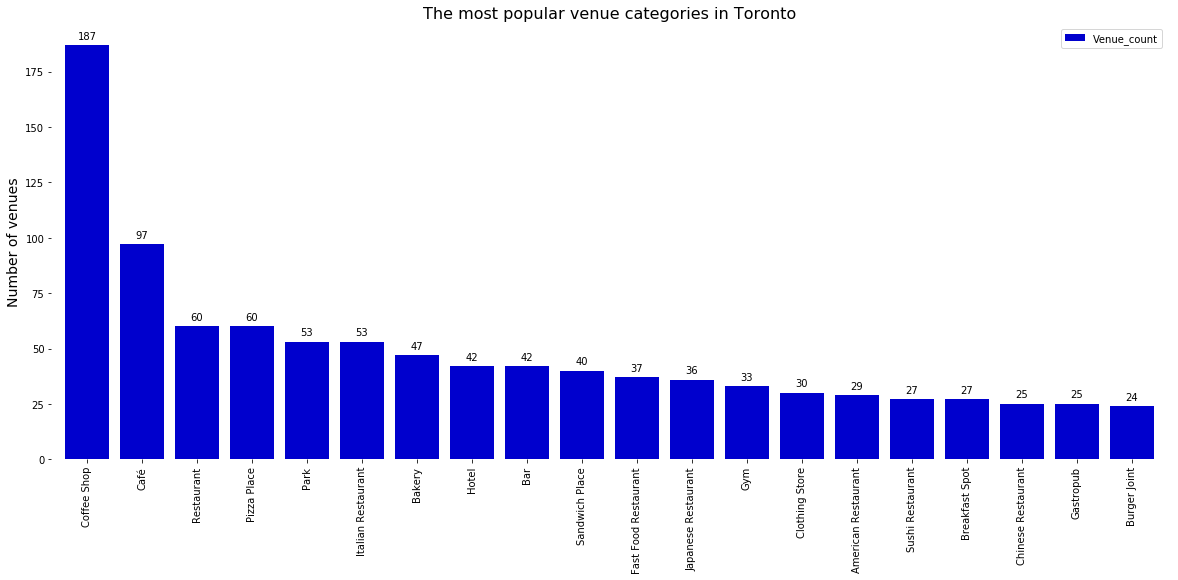

In [60]:
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
ax1 = tr301_venue_types.head(20).plot(kind='bar', stacked=False, width=0.8, color=['mediumblue'], figsize=(20,8))
pt.title("The most popular venue categories in Toronto", size=16)
pt.ylabel('Number of venues',size=14)
#pt.xlabel('Category',size=14)
ax1.xaxis.label.set_visible(False)
#ax1.set_xticklabels(df003_plot['Survey Question'])
#pt.text(x = )
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)

rects = ax1.patches
autolabel(rects, ax1)

ax1.legend()

There are roughly double the number of coffee shops than any other venue.  There are a large number of eateries otherwise.  

In [61]:
# Explore the different categories in each neighbourhood
corr001 = pd.crosstab(tr200_venues.Neighborhood, tr200_venues.Venue_Category)

In [62]:
corr002 = corr001.corr()

In [63]:
#Results too granular, focus on 
#corr002.style.background_gradient(cmap='coolwarm')

In [64]:
def neighborhood_agg(x):
    names = {
        'Venue_count': x['Venue'].count(),
        'Venue_category_count': x['Venue_Category'].nunique(),
        #'Total_Number': x['Number'].sum(),
        
        'Coffee_shop_count': x[x['Venue_Category']=='Coffee Shop']['Venue'].count(),
        'Cafe_shop_count': x[x['Venue_Category']=='Café']['Venue'].count(),
        'Pizza_count': x[x['Venue_Category']=='Pizza Place']['Venue'].count(),
        'Restaurant_count': x[x['Venue_Category']=='Restaurant']['Venue'].count(),
        'Park_count': x[x['Venue_Category']=='Park']['Venue'].count(),
        'Italian_Restaurant_count': x[x['Venue_Category']=='Italian Restaurant']['Venue'].count(),
        'Bakery_count': x[x['Venue_Category']=='Bakery']['Venue'].count(),
        'Bar_count': x[x['Venue_Category']=='Bar']['Venue'].count(),
        'Hotel_count': x[x['Venue_Category']=='Hotel']['Venue'].count(),
        'Sandwich_Place_count': x[x['Venue_Category']=='Sandwich Place']['Venue'].count(),
        'Fast_Food_count': x[x['Venue_Category']=='Fast Food Restaurant']['Venue'].count(),
        'Japanese_Restaurant_count': x[x['Venue_Category']=='Japanese Restaurant']['Venue'].count(),
        'Gym_count': x[x['Venue_Category']=='Gym']['Venue'].count(),
        'American_Restaurant_count': x[x['Venue_Category']=='American Restaurant']['Venue'].count(),
        'Clothing_Store_count': x[x['Venue_Category']=='Clothing Store']['Venue'].count(),
        'Sushi_Restaurant_count': x[x['Venue_Category']=='Sushi Restaurant']['Venue'].count(),
        'Breakfast_Spot_count': x[x['Venue_Category']=='Breakfast Spot']['Venue'].count(),
        'Chinese_Restaurant_count': x[x['Venue_Category']=='Chinese Restaurant']['Venue'].count(),
        'Grocery_Store_count': x[x['Venue_Category']=='Grocery Store']['Venue'].count(),
        'Gastropub_count': x[x['Venue_Category']=='Gastropub']['Venue'].count()
        #'Number_Status=N': x[x['Status']=='N']['Number'].sum()
    }

    return pd.Series(names)

In [65]:
tr300_pcode_venues = tr200_venues.groupby('Neighborhood').apply(neighborhood_agg)

In [66]:
corr010_pcode = tr300_pcode_venues.corr()
corr010_pcode.style.background_gradient(cmap='coolwarm')

,Venue_count,Venue_category_count,Coffee_shop_count,Cafe_shop_count,Pizza_count,Restaurant_count,Park_count,Italian_Restaurant_count,Bakery_count,Bar_count,Hotel_count,Sandwich_Place_count,Fast_Food_count,Japanese_Restaurant_count,Gym_count,American_Restaurant_count,Clothing_Store_count,Sushi_Restaurant_count,Breakfast_Spot_count,Chinese_Restaurant_count,Grocery_Store_count,Gastropub_count
Venue_count,1,0.988443,0.892716,0.853133,0.47576,0.840252,0.319523,0.758906,0.715979,0.602735,0.756788,0.369833,0.375211,0.739934,0.601319,0.679639,0.394235,0.462172,0.465456,0.468576,0.105515,0.719081
Venue_category_count,0.988443,1,0.865866,0.812004,0.474346,0.824408,0.323955,0.745474,0.688132,0.574915,0.690411,0.389893,0.412564,0.739905,0.576105,0.633487,0.427456,0.493218,0.466187,0.459354,0.129043,0.681939
Coffee_shop_count,0.892716,0.865866,1,0.74984,0.367581,0.754921,0.302048,0.771432,0.594795,0.466451,0.773834,0.39049,0.303715,0.652035,0.581524,0.653108,0.326673,0.394203,0.443401,0.341247,0.0170996,0.647191
Cafe_shop_count,0.853133,0.812004,0.74984,1,0.445629,0.754378,0.29501,0.682214,0.731727,0.630021,0.727035,0.373186,0.115211,0.578889,0.597227,0.6887,0.115317,0.363276,0.399495,0.443209,0.121162,0.751882
Pizza_count,0.47576,0.474346,0.367581,0.445629,1,0.517424,0.0937003,0.448574,0.231706,0.262461,0.356431,0.492871,0.134962,0.263478,0.316684,0.271461,0.0425003,0.434001,0.154527,0.131939,3.90999e-17,0.355215
Restaurant_count,0.840252,0.824408,0.754921,0.754378,0.517424,1,0.167491,0.662209,0.55807,0.425347,0.790685,0.280324,0.36769,0.722938,0.667223,0.705807,0.276543,0.469244,0.572036,0.124622,0.110883,0.765041
Park_count,0.319523,0.323955,0.302048,0.29501,0.0937003,0.167491,1,0.316515,0.38161,0.0891153,0.201426,0.119853,0.042779,0.139803,0.0293167,-0.00701849,-0.0262382,0.0140005,0.198331,0.187559,0.0972684,0.115419
Italian_Restaurant_count,0.758906,0.745474,0.771432,0.682214,0.448574,0.662209,0.316515,1,0.493059,0.397466,0.620841,0.418586,0.143393,0.48321,0.375665,0.502052,0.214657,0.352361,0.380284,0.358069,0.128779,0.589441
Bakery_count,0.715979,0.688132,0.594795,0.731727,0.231706,0.55807,0.38161,0.493059,1,0.565751,0.582554,0.115206,0.188631,0.383804,0.338103,0.49014,0.159327,0.00487055,0.376596,0.419096,-0.00886084,0.485717
Bar_count,0.602735,0.574915,0.466451,0.630021,0.262461,0.425347,0.0891153,0.397466,0.565751,1,0.377254,0.141878,-0.0426512,0.343149,0.380823,0.393523,0.0223093,0.213885,0.117678,0.367931,-0.0269598,0.398592


Coffee shops are key - see third column.  Correlate with cafe and restaurant.  Low correlation with fast food, parks and lowest with grocery store

In [187]:
# Pull data on the coffee shops to map
tr200_coffee = tr200_venues[tr200_venues['Venue_Category']=='Coffee Shop']

In [188]:
tr200_coffee.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Distance,Venue_Formatted_Address,Venue_Category
11,M1G,43.770992,-79.216917,Starbucks,43.770037,-79.221156,356,"[300 Borough Dr (Scarborough Town Centre), Sca...",Coffee Shop
12,M1G,43.770992,-79.216917,Tim Hortons,43.770827,-79.223078,495,"[1100 Markham Rd (Ellesmere Rd), Scarborough O...",Coffee Shop
24,M1K,43.727929,-79.262029,Tim Hortons,43.726895,-79.266157,351,"[678-682 Kennedy Rd, Scarborough ON M1K 2B5, C...",Coffee Shop
78,M1W,43.799525,-79.318389,Tim Hortons,43.799102,-79.318715,53,"[2900 Warden Ave, Unit 149 (Finch Ave E), Scar...",Coffee Shop
103,M2J,43.778517,-79.346556,Aroma Espresso Bar,43.777700,-79.344652,178,"[1800 Sheppard Ave. E (in Fairview Mall), Toro...",Coffee Shop


In [189]:
# create map of Toronto using latitude and longitude values
map_toronto_4 = folium.Map(location=[43.715383, -79.405678], zoom_start=11)

# add markers for postcodes to map
for lat, lng, label in zip(tr100_toronto_geo['Latitude'], tr100_toronto_geo['Longitude'], tr100_toronto_geo['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_toronto_4)  

# add Coffee shops to map
for lat, lng, label in zip(tr200_coffee['Venue_Latitude'], tr200_coffee['Venue_Longitude'], tr200_coffee['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        #popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5
    ).add_to(map_toronto_4)  
    
# Show map 
map_toronto_4



In [190]:
# Pull data on the coffee shops to map
tr200_cafe = tr200_venues[tr200_venues['Venue_Category']=='Café']

In [191]:
# create map of Toronto using latitude and longitude values
map_toronto_5 = folium.Map(location=[43.715383, -79.405678], zoom_start=11)

# add markers for postcodes to map
for lat, lng, label in zip(tr100_toronto_geo['Latitude'], tr100_toronto_geo['Longitude'], tr100_toronto_geo['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_toronto_5)  

# add Coffee shops to map
for lat, lng, label in zip(tr200_coffee['Venue_Latitude'], tr200_coffee['Venue_Longitude'], tr200_coffee['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        #popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5
    ).add_to(map_toronto_5)  
    
    
# add Cafe venues to map
for lat, lng, label in zip(tr200_cafe['Venue_Latitude'], tr200_cafe['Venue_Longitude'], tr200_cafe['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        #popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5
    ).add_to(map_toronto_5)  
    
    
# Show map 
map_toronto_5



# Part 6 - Create clusters and segment the neighbourhoods

In [192]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans_01 = KMeans(n_clusters=kclusters, random_state=0).fit(tr300_pcode_venues)

# check cluster labels generated for each row in the dataframe
kmeans_01.labels_[0:20] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2])

In [193]:
# add clustering labels
tr301_pcode_cluster = tr300_pcode_venues

In [202]:
tr301_pcode_cluster['Cluster_Labels'] = kmeans_01.labels_

In [203]:
tr301_pcode_cluster

,Venue_count,Venue_category_count,Coffee_shop_count,Cafe_shop_count,Pizza_count,Restaurant_count,Park_count,Italian_Restaurant_count,Bakery_count,Bar_count,...,Japanese_Restaurant_count,Gym_count,American_Restaurant_count,Clothing_Store_count,Sushi_Restaurant_count,Breakfast_Spot_count,Chinese_Restaurant_count,Grocery_Store_count,Gastropub_count,Cluster_Labels
Neighborhood,,,,,,,,,,,,,,,,,,,,,
M1B,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
M1C,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
M1E,7,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
M1G,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
M1H,7,7,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
M1J,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
M1K,4,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
M1L,9,8,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,2
M1M,2,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [204]:
#tr301_pcode_cluster.rename(columns={'Neighborhood': 'Neighbourhood'})

In [205]:
tr302_pcode_geo = pd.merge(tr301_pcode_cluster, tr100_toronto_geo, how='left', left_on='Neighborhood', right_on='Postcode')

In [206]:
tr302_pcode_geo.head(10)

,Venue_count,Venue_category_count,Coffee_shop_count,Cafe_shop_count,Pizza_count,Restaurant_count,Park_count,Italian_Restaurant_count,Bakery_count,Bar_count,...,Breakfast_Spot_count,Chinese_Restaurant_count,Grocery_Store_count,Gastropub_count,Cluster_Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,7,7,0,0,1,0,0,0,0,0,...,1,0,0,0,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,2,M1G,Scarborough,Woburn,43.770992,-79.216917
4,7,7,0,0,0,0,0,0,1,0,...,0,0,0,0,2,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,4,4,1,0,0,0,0,0,0,0,...,0,0,0,0,2,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,9,8,0,0,0,0,1,0,2,0,...,0,0,0,0,2,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,4,4,0,1,0,0,0,0,0,0,...,0,0,0,0,2,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [207]:
import numpy as np

In [208]:
# create map
map_toronto_6_cluster = folium.Map(location=[43.715383, -79.405678], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tr302_pcode_geo['Latitude'], tr302_pcode_geo['Longitude'], tr302_pcode_geo['Neighbourhood'], tr302_pcode_geo['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto_6_cluster)
       
map_toronto_6_cluster

The k means clustering returned a clear 'downtown' group (in purple).  There is an orange group which appears to refer to non geographic places (eg sorting office ect).  The remaining three groups are clusters of suburbia.